<a href="https://colab.research.google.com/github/Hamid-abdellaoui/crop-yield-predection/blob/main/internship_crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  
# <font color='#03d7fc'>▶ Modèle Auto-Régressif (AR)</font>
Les modèles auto-régressifs fonctionnent en partant du principe que les valeurs passées ont un effet sur les valeurs actuelles. Les modèles AR sont couramment utilisés pour analyser la nature, l’économie et d’autres processus variables dans le temps. Tant que l’hypothèse tient, nous pouvons construire un modèle de régression linéaire qui tente de prédire aujourd’hui la valeur d’une variable dépendante, compte tenu des valeurs qu’elle avait les jours précédents. <br>
<img src='https://assets.moncoachdata.com/v7/moncoachdata.com/wp-content/uploads/2020/01/modele-ar.png?w=600'/> <br>

# <font color='#03d7fc'>▶ Modèle de la Moyenne Mobile (MA)</font>
Supposez que la valeur de la variable dépendante du jour en cours dépend des termes d’erreur des jours précédents. La formule peut être exprimée sous cette forme :<br>
<img src='https://assets.moncoachdata.com/v7/moncoachdata.com/wp-content/uploads/2020/01/modele-moyenne-mobile-formule1.png?w=600'/> <br>
où μ est la moyenne de la série, les θ1, …, θq sont les paramètres du modèle et les εt, εt-1,…, εt-q sont les termes d’erreur de bruit. La valeur de q est appelée l’ordre du modèle MA. <br>
# <font color='#03d7fc'>▶ Modèle de la Moyenne Mobile Auto-Régressive (ARMA)</font>
Le modèle ARMA est simplement la combinaison des 2 précédents modèles AR et MA : <br>
<img src='https://assets.moncoachdata.com/v7/moncoachdata.com/wp-content/uploads/2020/01/formule-modele-arma.png?w=600'/> <br>
# <font color='#03d7fc'>▶ Modèle de la Moyenne Mobile Auto-Régressive Intégrée (ARIMA) </font>
Le modèle ARIMA ajoute une différence à un modèle ARMA. La différenciation soustrait la valeur actuelle de la précédente et peut être utilisée pour transformer une série temporelle en une série stationnaire. Par exemple, la différenciation du premier ordre traite des tendances linéaires et utilise la transformation zi = yi – yi-1. <br>
La différenciation du second ordre traite des tendances quadratiques et utilise une différence du premier ordre sur une différence du premier ordre, à savoir zi = (yi – yi-1) – (yi-1 – yi-2), et ainsi de suite. <br>

Trois entiers (p, d, q) sont généralement utilisés pour paramétrer les modèles ARIMA : <br>
<b>
* p : nombre de termes autorégressifs (ordre AR) 
* d : nombre de différences non saisonnières (ordre de différenciation)
* q : nombre de termes moyens mobiles (ordre MA)</b>
 <br>

# <font color='#03d7fc'> ▶ Modèle SARIMA: Seasonal ARIMA </font><br>
SARIMA: Seasonal ARIMA ou ARIMA saisonnier est une extension du modèle ARIMA.
<img src='https://miro.medium.com/max/1400/0*hTDJbnnbhS3SDJvc.png' width=600/> <br>
Il permet de modéliser les séries temporelles comportant une composante saisonnière et désigné par 7 paramètres : <br>
<b>
* p, d, q : les même que ceux de ARIMA.
* P : ordre de la partie autorégressive saisonnière.
* D : ordre de la différence saisonnière.
* Q : ordre de la moyenne mobile saisonnière.
* m : la période de la composante saisonnière. <b> <br>


<img src='https://i.stack.imgur.com/NUA6V.png'  width=600/>

## 1. Data Preparation

### 1.1 Standard imports and load datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path='https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/Daily%2030%20years.csv'
data = pd.read_csv(path, sep=';' , parse_dates = ['date'], index_col = ['date'])
data.head()

,tavg,tmin,tmax,prcp
date,,,,
1990-01-01,11.6,6.6,17.0,0.0
1990-02-01,12.8,6.9,NaN,0.5
1990-03-01,10.7,NaN,12.9,4.1
1990-04-01,9.8,6.2,14.2,13.0
1990-05-01,10.3,NaN,15.4,1.0


✔ tavg : Température moyenne <br>
✔ tmin : Température min<br>
✔ tmax : Température max<br>
✔ prcp : quantités précipétations en mm<br>

In [ ]:
data.shape

(11324, 4)

✔ Notre Dataset contient quatre colonne et 11324 observations

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tavg,11260.0,16.753375,5.013852,2.6,12.6,16.6,20.9,35.9
tmin,8469.0,11.091676,5.356203,-4.6,6.9,11.2,15.8,28.2
tmax,8516.0,23.197511,5.729353,9.1,18.6,23.0,27.1,46.3
prcp,7775.0,1.100810,5.448090,0.0,0.0,0.0,0.0,270.0


On va supprimmer les deux colonnes tmin et tmax car on'en aura pas besoin

In [ ]:
data=data.drop(['tmax','tmin'], axis=1)
data.isna().sum()

tavg      64
prcp    3549
dtype: int64

### 1.2 les valeures manquantes

✔ Il y'a des valeurs manquantes, 31% des données de la colonne précipétations sont manquantes. <br>
✔ On va  remplisser ces valeurs manquantes par interpolation linéaire.
<br> ✔ la formule d'interpolation est :<br> 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/4953daa93f7583973d7ae5716f53873f96b42afb'/>

In [ ]:
data.interpolate(method="linear", inplace=True)
data.isna().sum()

tavg    0
prcp    0
dtype: int64

### 1.3 rééchantillonnage

#####          Données mensuelles

In [ ]:
monthlyData=pd.DataFrame()
monthlyData['prcp']=data['prcp'].resample('M').sum()
monthlyData['tavg']=data['tavg'].resample('M').mean()
monthlyData.drop(monthlyData.tail(1).index,inplace=True)
monthlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    372 non-null    float64
 1   tavg    372 non-null    float64
dtypes: float64(2)
memory usage: 8.7 KB


#####          Données annuelles

In [ ]:
yearlyData=pd.DataFrame()
yearlyData['prcp']=monthlyData['prcp'].resample('Y').sum()
yearlyData['tavg']=monthlyData['tavg'].resample('Y').mean()
yearlyData.drop(yearlyData.tail(1).index,inplace=True)
yearlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1990-12-31 to 2019-12-31
Freq: A-DEC
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    30 non-null     float64
 1   tavg    30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


####   Ploting

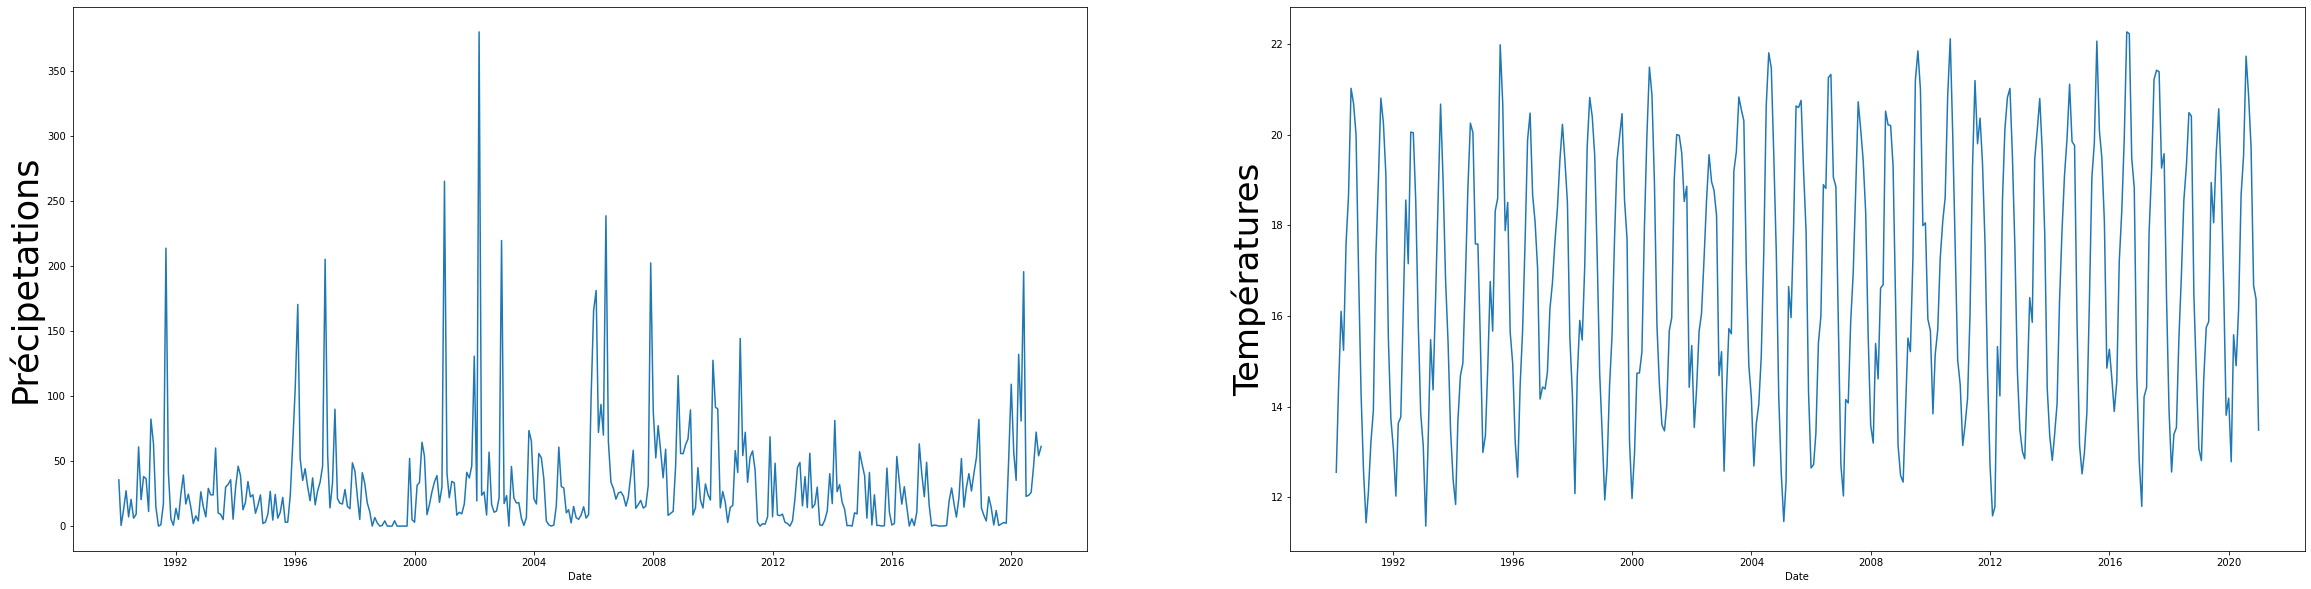

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))

plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=35)
plt.plot(monthlyData[['prcp']])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Températures',fontsize=34)
plt.plot(monthlyData[['tavg']])

plt.show()

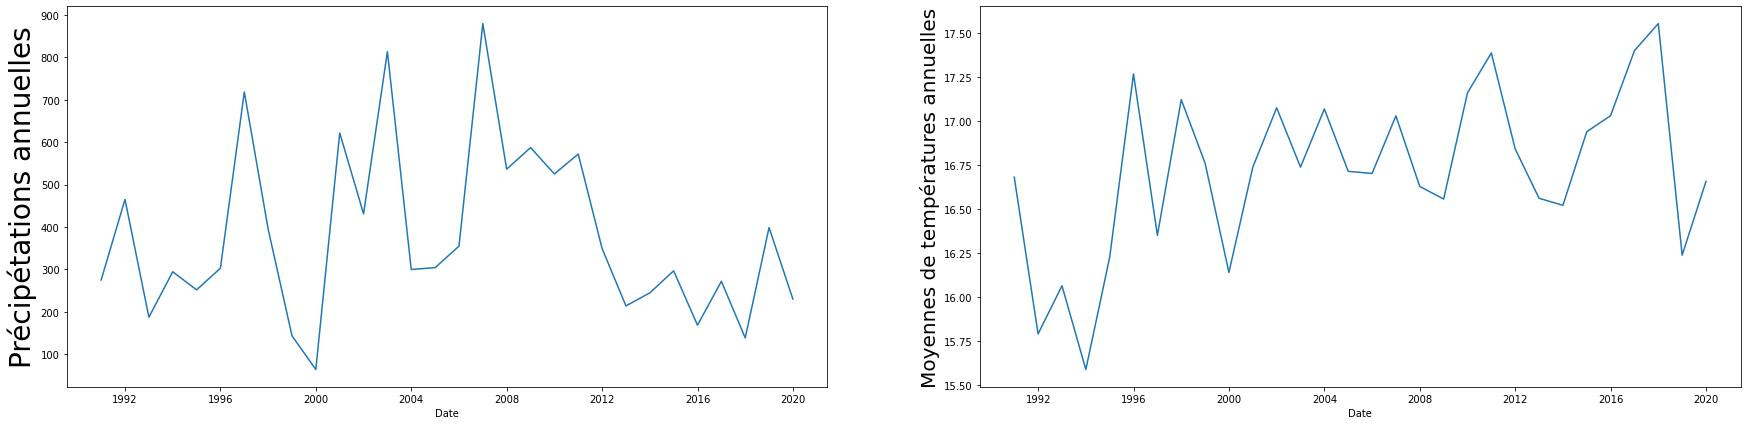

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Précipétations annuelles',fontsize=28)
plt.plot(yearlyData[['prcp']])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Moyennes de températures annuelles',fontsize=20)
plt.plot(yearlyData[['tavg']])

plt.show()

## 2. Temperatures 

### 2.1 Importation et exploration

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
temperature = monthlyData[['tavg']].copy()
temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    372 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


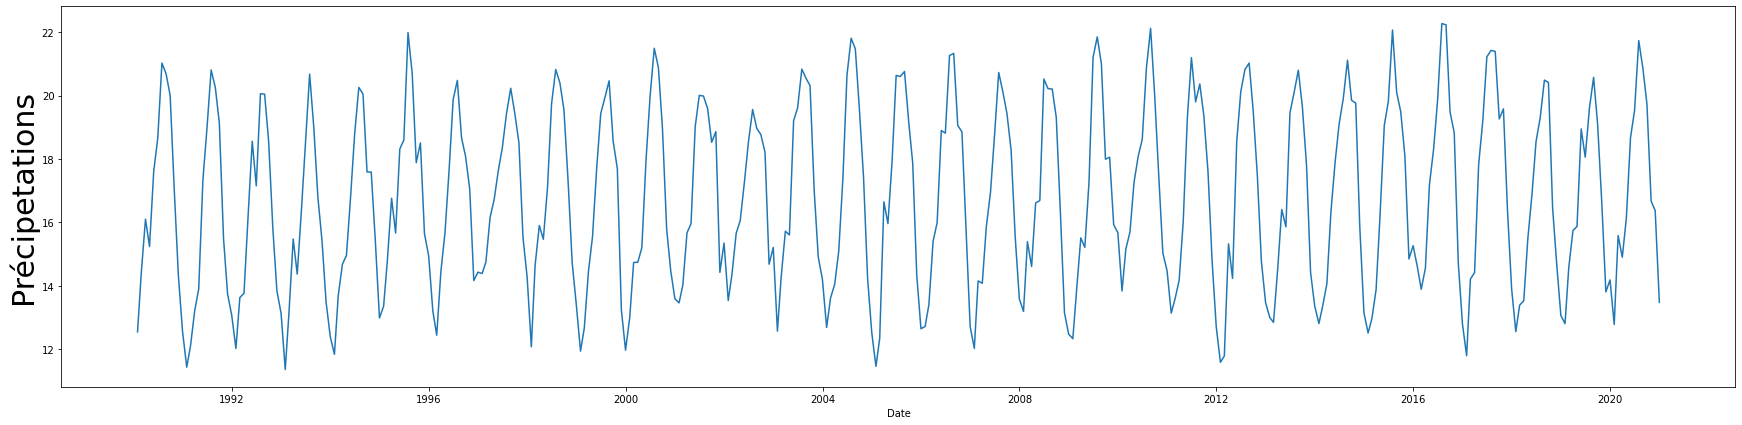

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=30)
plt.plot(temperature)
plt.show()

### 2.2 Stationnarité

#### Par observation

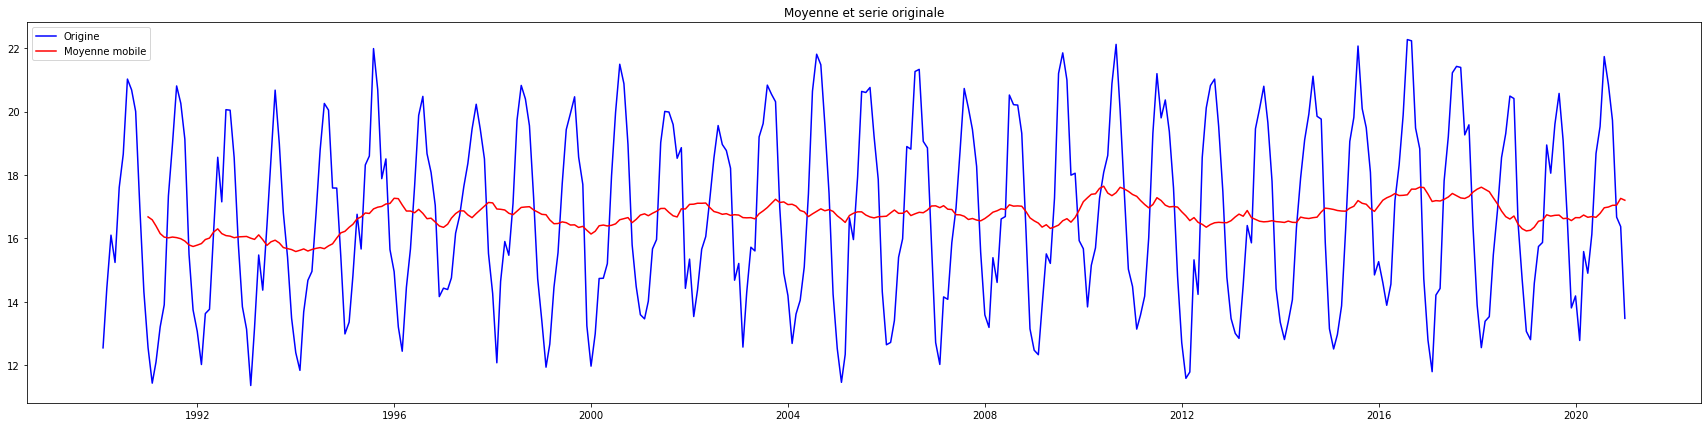

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
rolling_mean = temperature.rolling(window = 12).mean()
plt.plot(temperature, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et serie originale')
plt.show()

✔ Le  moyen mobile est quasi- constante donc on peut estimer que notre série de données est stationnaires

#### Par test de Dickey Fuller

In [ ]:
result = adfuller(temperature['tavg'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.9705355266877147
p-value : 0.037739139804055015
Valeurs Critiques :
	1%: -3.448645946352023
	5%: -2.869602139060357
	10%: -2.5710650077160495


✔ La p-value est inférieure au seuil de 0,05 et la statistique ADF est proche des valeurs critiques. Par conséquent, la série temporelle est bel et bien stationnaire.<br>
On doit donc choisir le modèle SARIMA qui est compatibe avec ce type de séries

### 2.3 Application du modèle SARIMA

### ▶ Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

#### Installation et mportation du package

In [ ]:
!pip install pmdarima==1.1.0

     |████████████████████████████████| 695 kB 7.8 MB/s 


In [ ]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#### 2.3.1 Saisonalité

✔ Le modèle est additif , on procède alors à la décompsition pour observer la saisonalité

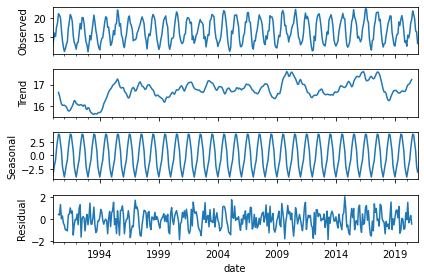

In [ ]:
result = seasonal_decompose(temperature['tavg'],model='add')
result.plot();

<font size=4>✔ y(t)  =  Trend(t) + Seasonality(t) + Residual(t) </font> <br>
✔ d'après la decompisition on constate clairement la présence d'une saisonalité 

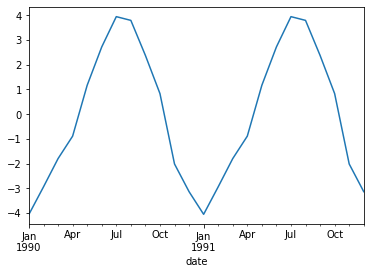

In [ ]:
result.seasonal.iloc[0:24].plot()

✔ une saisonalité d'une année = 12 mois

#### 2.3.2 Stationarité

In [ ]:
result = adfuller(temperature['tavg'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.9705355266877147
p-value : 0.037739139804055015
Valeurs Critiques :
	1%: -3.448645946352023
	5%: -2.869602139060357
	10%: -2.5710650077160495


✔ Avec le test de Dickey fuller on constate que la série est stationnaire

#### 2.3.3 On cherche les ordres du modèle SARIMA

In [ ]:
auto_arima(temperature['tavg'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  372
Model:             SARIMAX(1, 0, 1)x(1, 0, 2, 12)   Log Likelihood                -496.331
Date:                            Thu, 12 Aug 2021   AIC                           1006.663
Time:                                    01:21:06   BIC                           1034.095
Sample:                                         0   HQIC                          1017.557
                                            - 372                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0080      0.008      0.978      0.328      -0.008       0.024
ar.L1          0.4220      0.136      3.103      0.002       0.155       0.689
ma.L1         -0.0682      0.152     -0.450      0.653      -0.365       0.229
ar.S.L12       0.9992      0.001   1186.773      0.000       0.998       1.001
ma.S.L12      -0.9493      0.054    -17.540      0.000      -1.055      -0.843
ma.S.L24       0.0250      0.055      0.456      0.648      -0.082       0.132
sigma2         0.7729      0.067     11.489      0.000       0.641       0.905
===================================================================================
Ljung-Box (Q):                       35.88   Jarque-Bera (JB):                 2.65
Prob(Q):                              0.66   Prob(JB):                         0.27
Heteroskedasticity (H):               1.10   Skew:                             0.01
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

✔ Donc on va modéliser cette série par un modèle SARIMA d'ordres (1, 0, 3)x(1, 0, 2, 12)

In [ ]:
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

### 2.4 Spliting data for testing

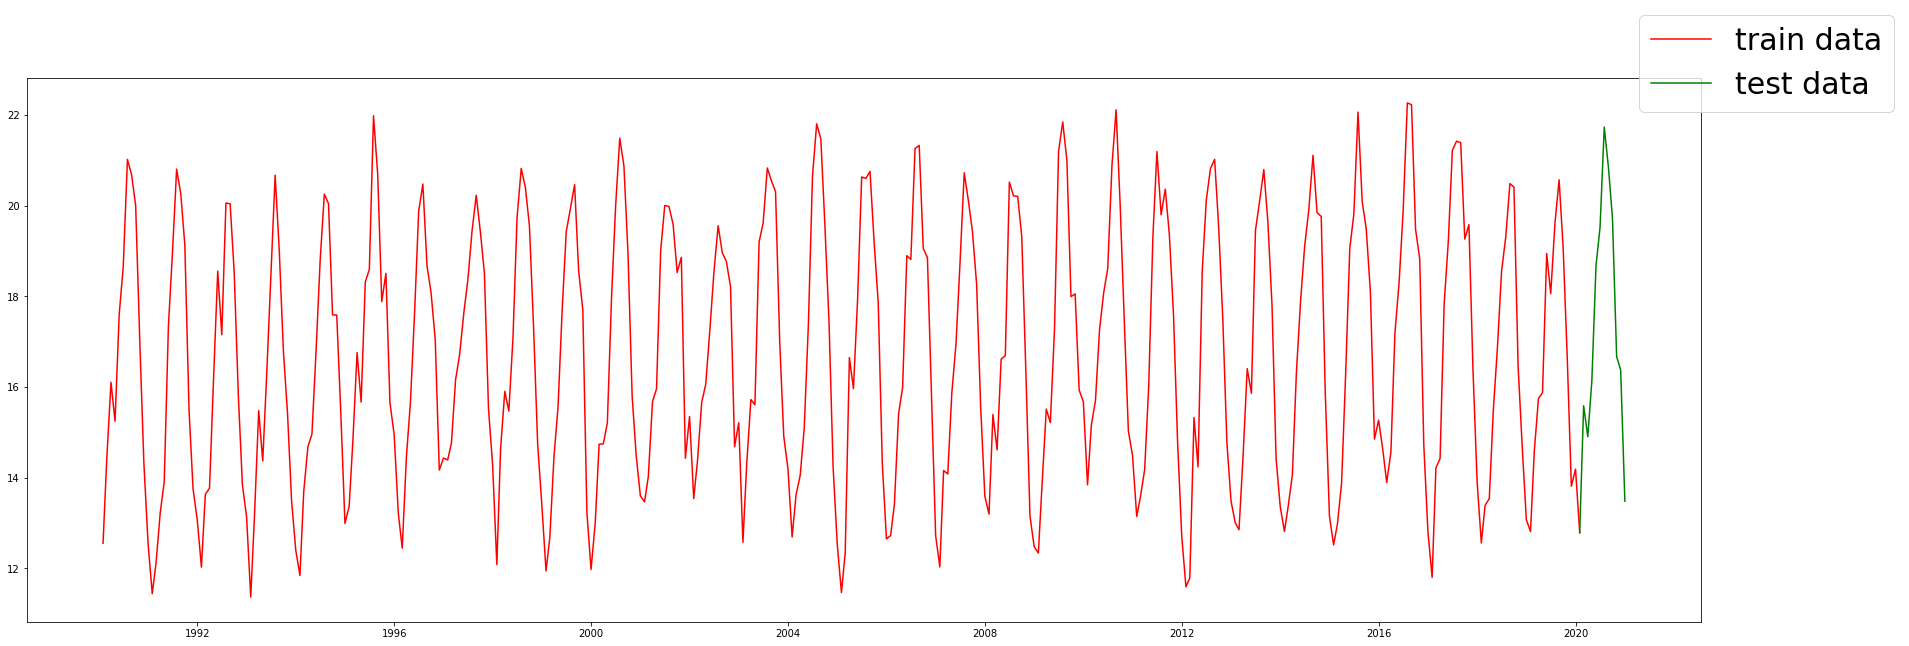

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
# Set one year for testing
train = temperature.iloc[:361]
valid = temperature.iloc[360:]
#preprocessing (since arima takes univariate series as input)
#train.drop('date',axis=1,inplace=True)
#valid.drop('date',axis=1,inplace=True)
 
#plotting the data
plt.plot(train['tavg'], color = 'red', label='train data') 
plt.plot(valid['tavg'], color = 'green', label ='test data')
fig.legend(fontsize=30)
plt. show()

In [ ]:
train.head()

,tavg
date,
1990-01-31,12.551613
1990-02-28,14.428571
1990-03-31,16.103226
1990-04-30,15.243333
1990-05-31,17.606452


#### Fiting the model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['tavg'],order=(1, 0, 3),seasonal_order=(1, 0, 2, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               tavg   No. Observations:                  361
Model:             SARIMAX(1, 0, 3)x(1, 0, 2, 12)   Log Likelihood                -483.049
Date:                            Thu, 12 Aug 2021   AIC                            982.098
Time:                                    01:21:12   BIC                           1013.209
Sample:                                01-31-1990   HQIC                           994.467
                                     - 01-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9982      0.008    117.571      0.000       0.982       1.015
ma.L1         -0.6215      0.058    -10.705      0.000      -0.735      -0.508
ma.L2         -0.1980      0.055     -3.592      0.000      -0.306      -0.090
ma.L3         -0.1509      0.054     -2.781      0.005      -0.257      -0.045
ar.S.L12       0.9990      0.001    869.452      0.000       0.997       1.001
ma.S.L12      -0.7970      0.056    -14.301      0.000      -0.906      -0.688
ma.S.L24      -0.1044      0.049     -2.113      0.035      -0.201      -0.008
sigma2         0.7877      0.074     10.609      0.000       0.642       0.933
===================================================================================
Ljung-Box (Q):                       29.71   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               1.09   Skew:                            -0.06
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Testing 

In [ ]:
start=len(train)-1
end=len(train)+len(valid)-2
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,3)(1,0,2,12) Predictions')

In [ ]:
predictions.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SARIMA(1,0,3)(1,0,2,12) Predictions  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [ ]:
for i in range(0,len(predictions)):
    print('Value =', round (predictions[i],3),'  ;  Expected =', round(valid.values[i][0],3),'      Expected- value =', round(-predictions[i]+valid.values[i][0],2))

Value = 13.096   ;  Expected = 12.784       Expected- value = -0.31
Value = 13.975   ;  Expected = 15.586       Expected- value = 1.61
Value = 14.96   ;  Expected = 14.903       Expected- value = -0.06
Value = 16.099   ;  Expected = 16.133       Expected- value = 0.03
Value = 18.185   ;  Expected = 18.677       Expected- value = 0.49
Value = 19.386   ;  Expected = 19.527       Expected- value = 0.14
Value = 20.549   ;  Expected = 21.732       Expected- value = 1.18
Value = 20.733   ;  Expected = 20.852       Expected- value = 0.12
Value = 19.309   ;  Expected = 19.723       Expected- value = 0.41
Value = 17.669   ;  Expected = 16.671       Expected- value = -1.0
Value = 14.768   ;  Expected = 16.373       Expected- value = 1.61
Value = 13.796   ;  Expected = 13.481       Expected- value = -0.32


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

<b>✔ </b> Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

<b>✔ </b>The formula for the mean squared error is<br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

<b>✔ </b>The formula for the root mean squared error is<br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

<b>✔ </b>The advantage of the RMSE is that it is expressed in the same units as the data.<br>

In [ ]:
error = mean_squared_error(valid['tavg'],predictions)
print('MSE error =', error)

MSE error = 0.6849505717406279


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(valid['tavg'], predictions)
print('RMSE Error: ', error)

RMSE Error:  0.827617406620129


✔ Des erreures RMSE et MSE faibles donc notre modèle est fiable

#### On compare les prédictions avec lesdonnées oroginelles

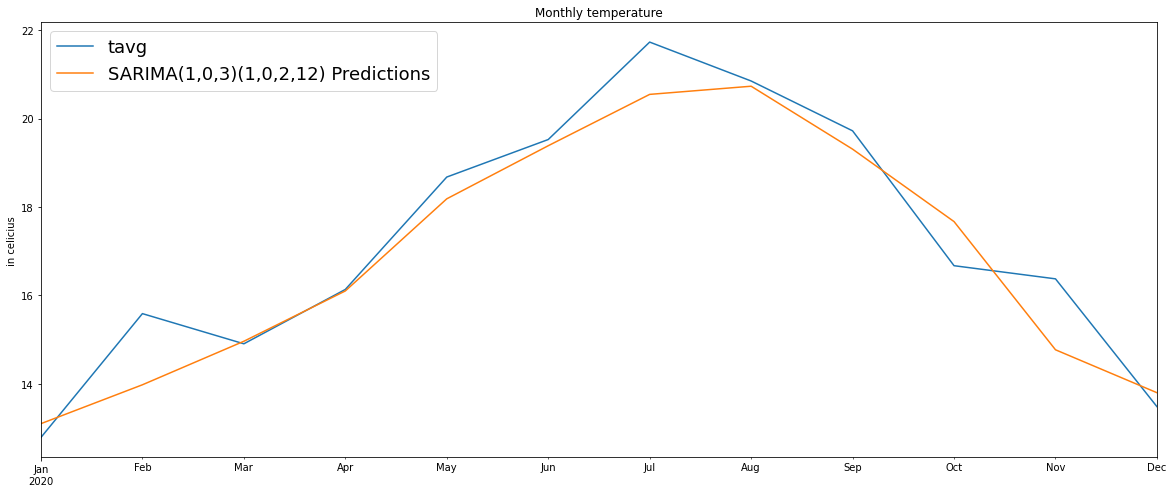

In [ ]:
title = 'Monthly temperature'
ylabel='in celicius'
xlabel=''

ax = valid['tavg'].plot(legend=True,figsize=(20,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.legend(fontsize=18)

### 2.5 Retrain the model on the full data, and forecast the future

In [ ]:
model = SARIMAX(temperature['tavg'],order=(1, 0, 3),seasonal_order=(1, 0, 2, 12))
results = model.fit()
fcast = results.predict(len(temperature),len(temperature)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

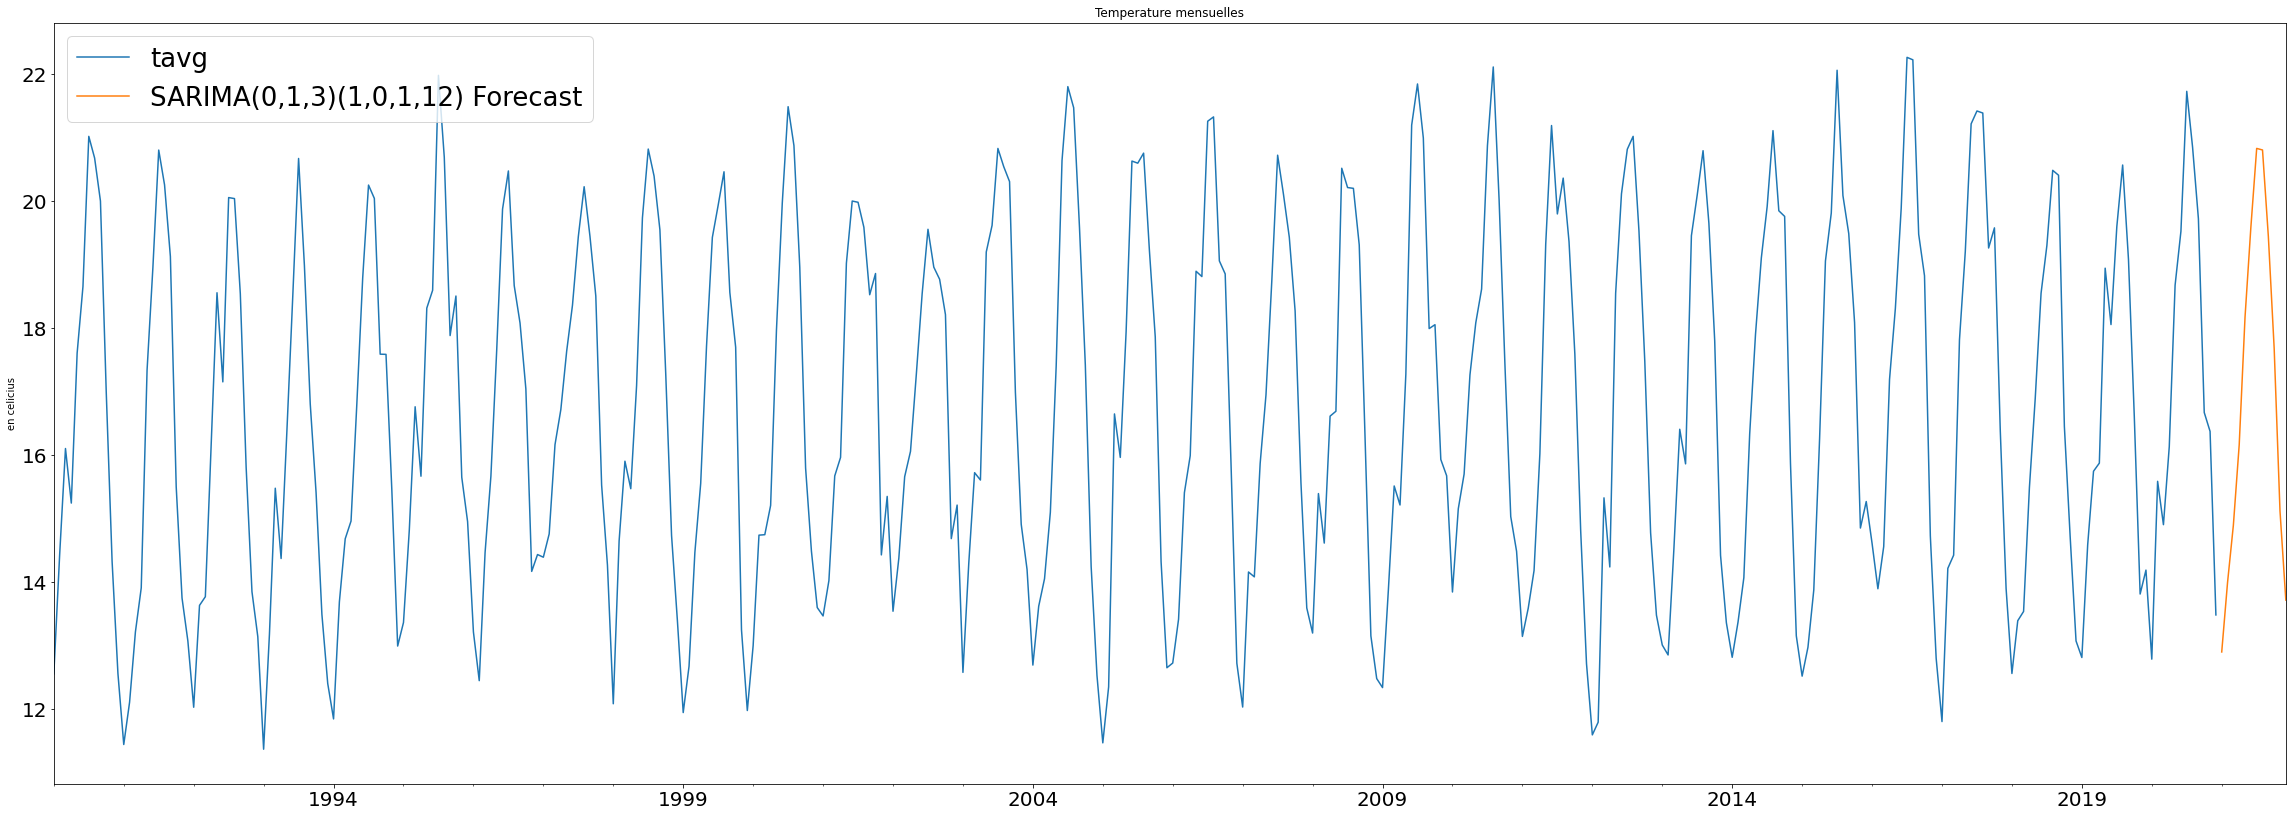

In [ ]:
# Plot predictions against known values
title = 'Temperature mensuelles'
ylabel='en celicius'
xlabel=''

ax = temperature['tavg'].plot(legend=True,figsize=(40,14),title=title)
fcast.plot(legend=True,fontsize=20)
ax.autoscale(axis='x',tight=True)
plt.legend(fontsize=26)
ax.set(xlabel=xlabel, ylabel=ylabel);

✔  Et voici nous prédictions de l'année 2021 :

In [ ]:
fcast.head(12)

2021-01-31    12.897025
2021-02-28    13.992413
2021-03-31    14.896220
2021-04-30    16.160649
2021-05-31    18.174589
2021-06-30    19.587696
2021-07-31    20.832699
2021-08-31    20.808019
2021-09-30    19.447194
2021-10-31    17.682581
2021-11-30    15.118550
2021-12-31    13.714602
Freq: M, Name: SARIMA(0,1,3)(1,0,1,12) Forecast, dtype: float64

## 3. Précipétations

In [ ]:
precipetation = monthlyData[['prcp']].copy()

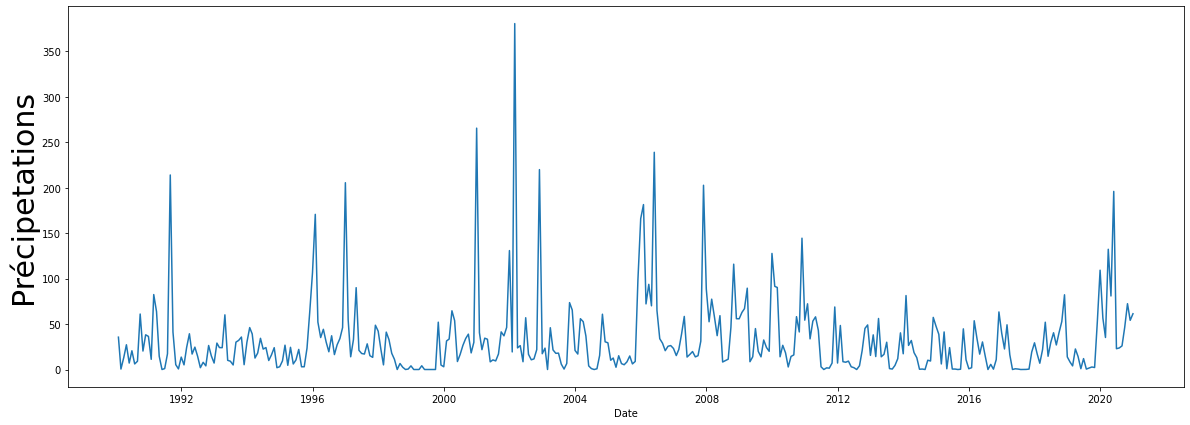

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=30)
plt.plot(precipetation)
plt.show()

#### Stationnarité

In [ ]:
result = adfuller(precipetation['prcp'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -3.86625474202957
p-value : 0.0022977175077413207
Valeurs Critiques :
	1%: -3.44880082033912
	5%: -2.869670179576637
	10%: -2.5711012838861036


<b>✔ </b> le test de Dickey fuller confirme que la série est stationnaire

#### Saisonalité

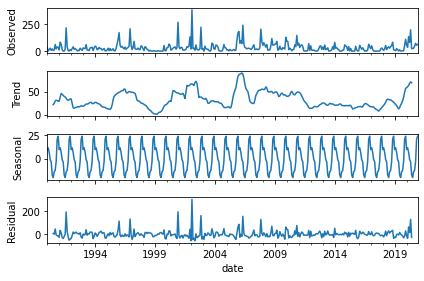

In [ ]:
result = seasonal_decompose(precipetation['prcp'],model='add')
result.plot();

✔ D'après la composante saisonière on peut supposer qu'il y'a saisonalité <br>
❌❗ Mais attention la composante <b>Residual</b> prend des valeurs très grandes( plus grandes que la <b>Trend</b> et <b>Seasonal</b> ensemble)
<br><b>➡</b> Donc la série ne présente pas une saisonnalité, on utulise donc ARIMA

In [ ]:
model = auto_arima(precipetation.prcp,test='adf',seasonal=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  372
Model:                     ARMA(2, 0)   Log Likelihood               -1909.390
Method:                       css-mle   S.D. of innovations             41.005
Date:                Thu, 12 Aug 2021   AIC                           3826.779
Time:                        01:21:26   BIC                           3842.455
Sample:                             0   HQIC                          3833.004
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6732      3.309      9.875      0.000      26.188      39.158
ar.L1.y        0.2298      0.051      4.476      0.000       0.129       0.330
ar.L2.y        0.1290      0.051      2.511      0.012       0.028       0.230
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0327           +0.0000j            2.0327            0.0000
AR.2           -3.8147           +0.0000j            3.8147            0.5000
-----------------------------------------------------------------------------
"""

On va utuliser ARMA(2,0) qui est aussi ARIMA(2,0,0)

## ARIMA

### Spliting data for testing

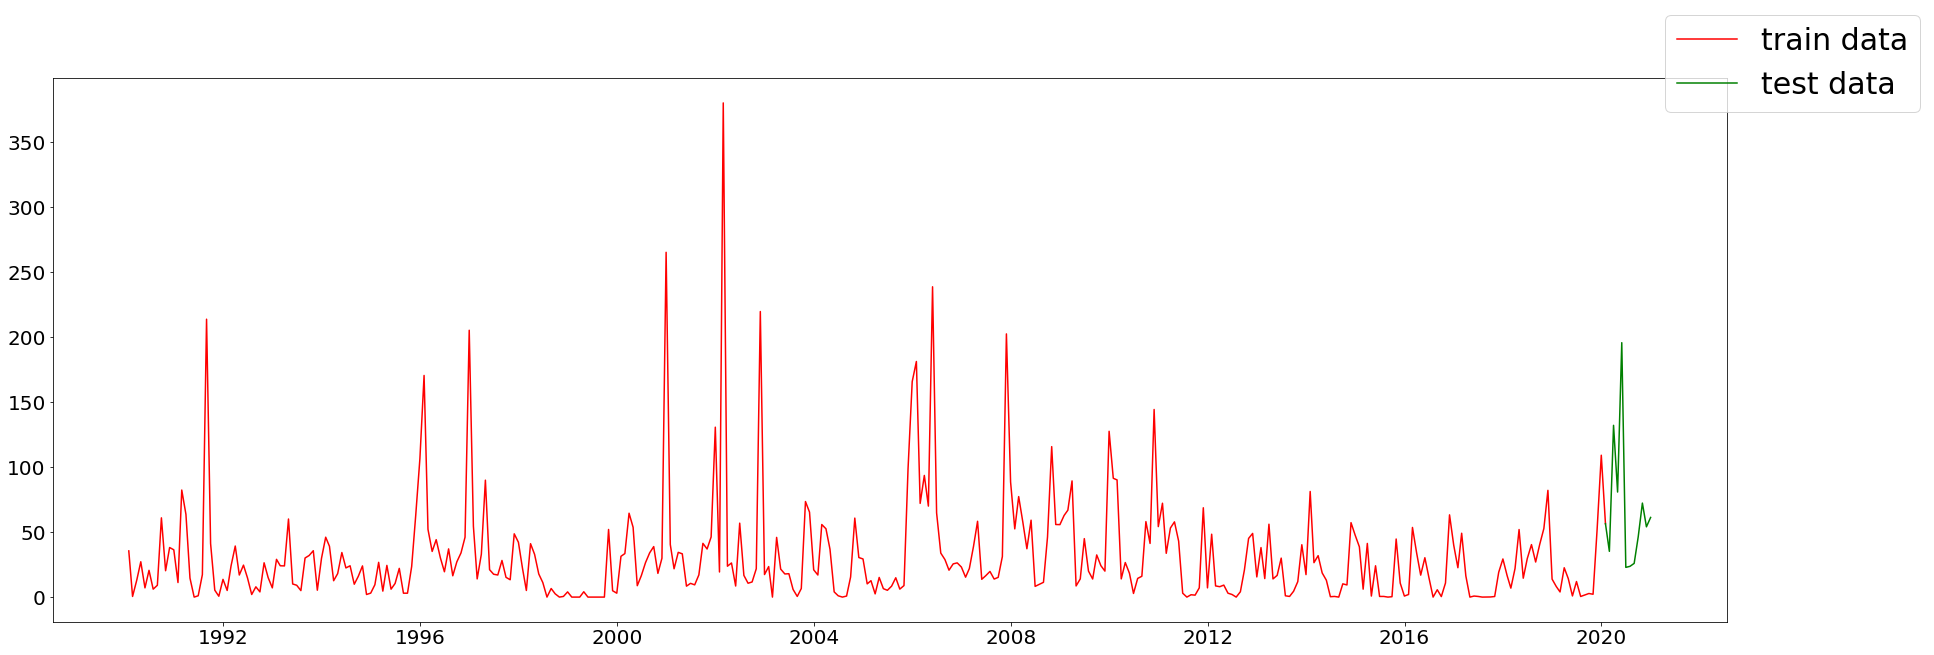

In [ ]:
train = precipetation.iloc[:361]
valid = precipetation.iloc[360:]
fig, ax = plt.subplots(figsize=(30, 10))

#plotting the data
plt.plot(train['prcp'], color = 'red', label='train data') 
plt.plot(valid['prcp'], color = 'green', label ='test data')
fig.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt. show()

In [ ]:
# Forecast
n_periods = 12
forecast, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_forecast = np.arange(len(precipetation.prcp), len(precipetation.prcp)+n_periods)

In [ ]:
for i in range(0,len(forecast)):
    print('Value =', round (forecast[i],3),'  ;  Expected =', round(valid.values[i][0],3),'      Expected- value =', round(-forecast[i]+valid.values[i][0],2))

Value = 42.015   ;  Expected = 56.512       Expected- value = 14.5
Value = 38.513   ;  Expected = 35.208       Expected- value = -3.3
Value = 35.22   ;  Expected = 132.2       Expected- value = 96.98
Value = 34.012   ;  Expected = 80.857       Expected- value = 46.85
Value = 33.309   ;  Expected = 195.83       Expected- value = 162.52
Value = 32.992   ;  Expected = 22.878       Expected- value = -10.11
Value = 32.829   ;  Expected = 23.681       Expected- value = -9.15
Value = 32.75   ;  Expected = 25.954       Expected- value = -6.8
Value = 32.711   ;  Expected = 46.376       Expected- value = 13.66
Value = 32.692   ;  Expected = 72.361       Expected- value = 39.67
Value = 32.682   ;  Expected = 54.087       Expected- value = 21.4
Value = 32.678   ;  Expected = 61.305       Expected- value = 28.63


In [ ]:
prcp_series =pd.Series(precipetation['prcp'].values ,index=np.arange(0, len(precipetation.prcp+13)))
prcp_series.head()

0    35.55
1     0.50
2    13.00
3    27.20
4     7.10
dtype: float64

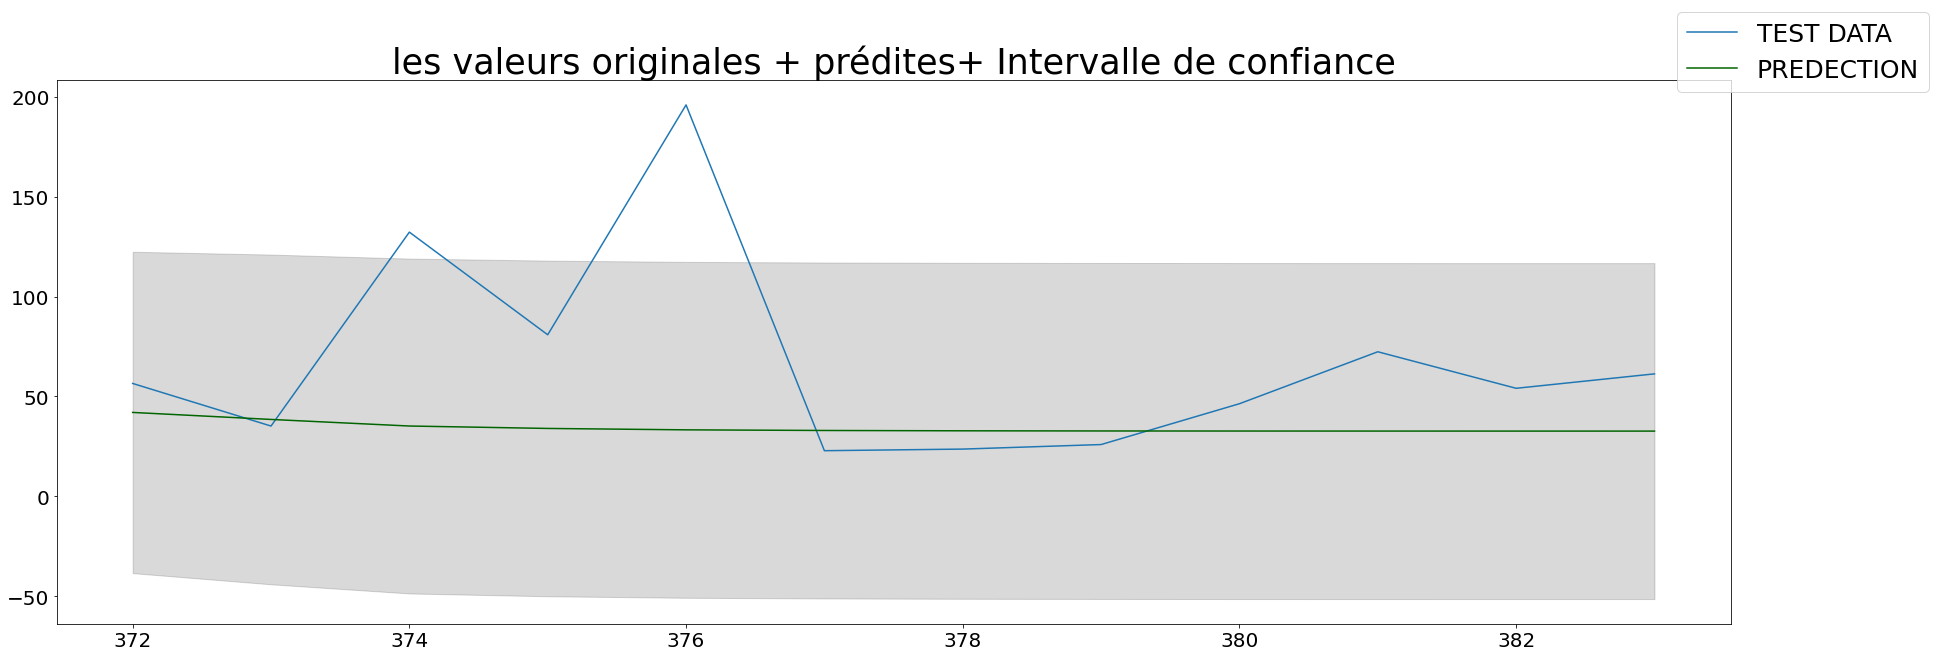

In [ ]:
# make series for plotting purpose
fc_series = pd.Series(forecast, index=index_of_forecast)
lower_series = pd.Series(confint[:, 0], index=index_of_forecast)
upper_series = pd.Series(confint[:, 1], index=index_of_forecast)
valid_series =pd.Series(valid['prcp'].values ,index=index_of_forecast)

# Plot
fig, ax = plt.subplots(figsize=(30, 10))
#plt.plot(prcp_series)
plt.plot(valid_series,label='TEST DATA')
plt.plot(fc_series, color='darkgreen',label='PREDECTION')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

fig.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("les valeurs originales + prédites+ Intervalle de confiance",fontsize=35)
plt.show()

In [ ]:
error = mean_squared_error(valid['prcp'],forecast)
print('MSE error =', error)

MSE error = 3458.6546443474203


In [ ]:
error = rmse(valid['prcp'],forecast)
print('RMSE Error: ', error)

RMSE Error:  58.810327701411595


Le modèle qu'ona suivi est très mauvaise.

In [ ]:
daily_prcp = data[['prcp']].copy()
daily_prcp.head()

,prcp
date,
1990-01-01,0.0
1990-02-01,0.5
1990-03-01,4.1
1990-04-01,13.0
1990-05-01,1.0


In [ ]:
daily_prcp=daily_prcp[(daily_prcp.prcp!=270) & (daily_prcp.prcp!=199.9)]
daily_prcp.max()

prcp    89.9
dtype: float64

In [ ]:
monthly=pd.DataFrame()
monthly['prcp']=daily_prcp['prcp'].resample('M').sum()
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 1990-01-31 to 2021-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    373 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


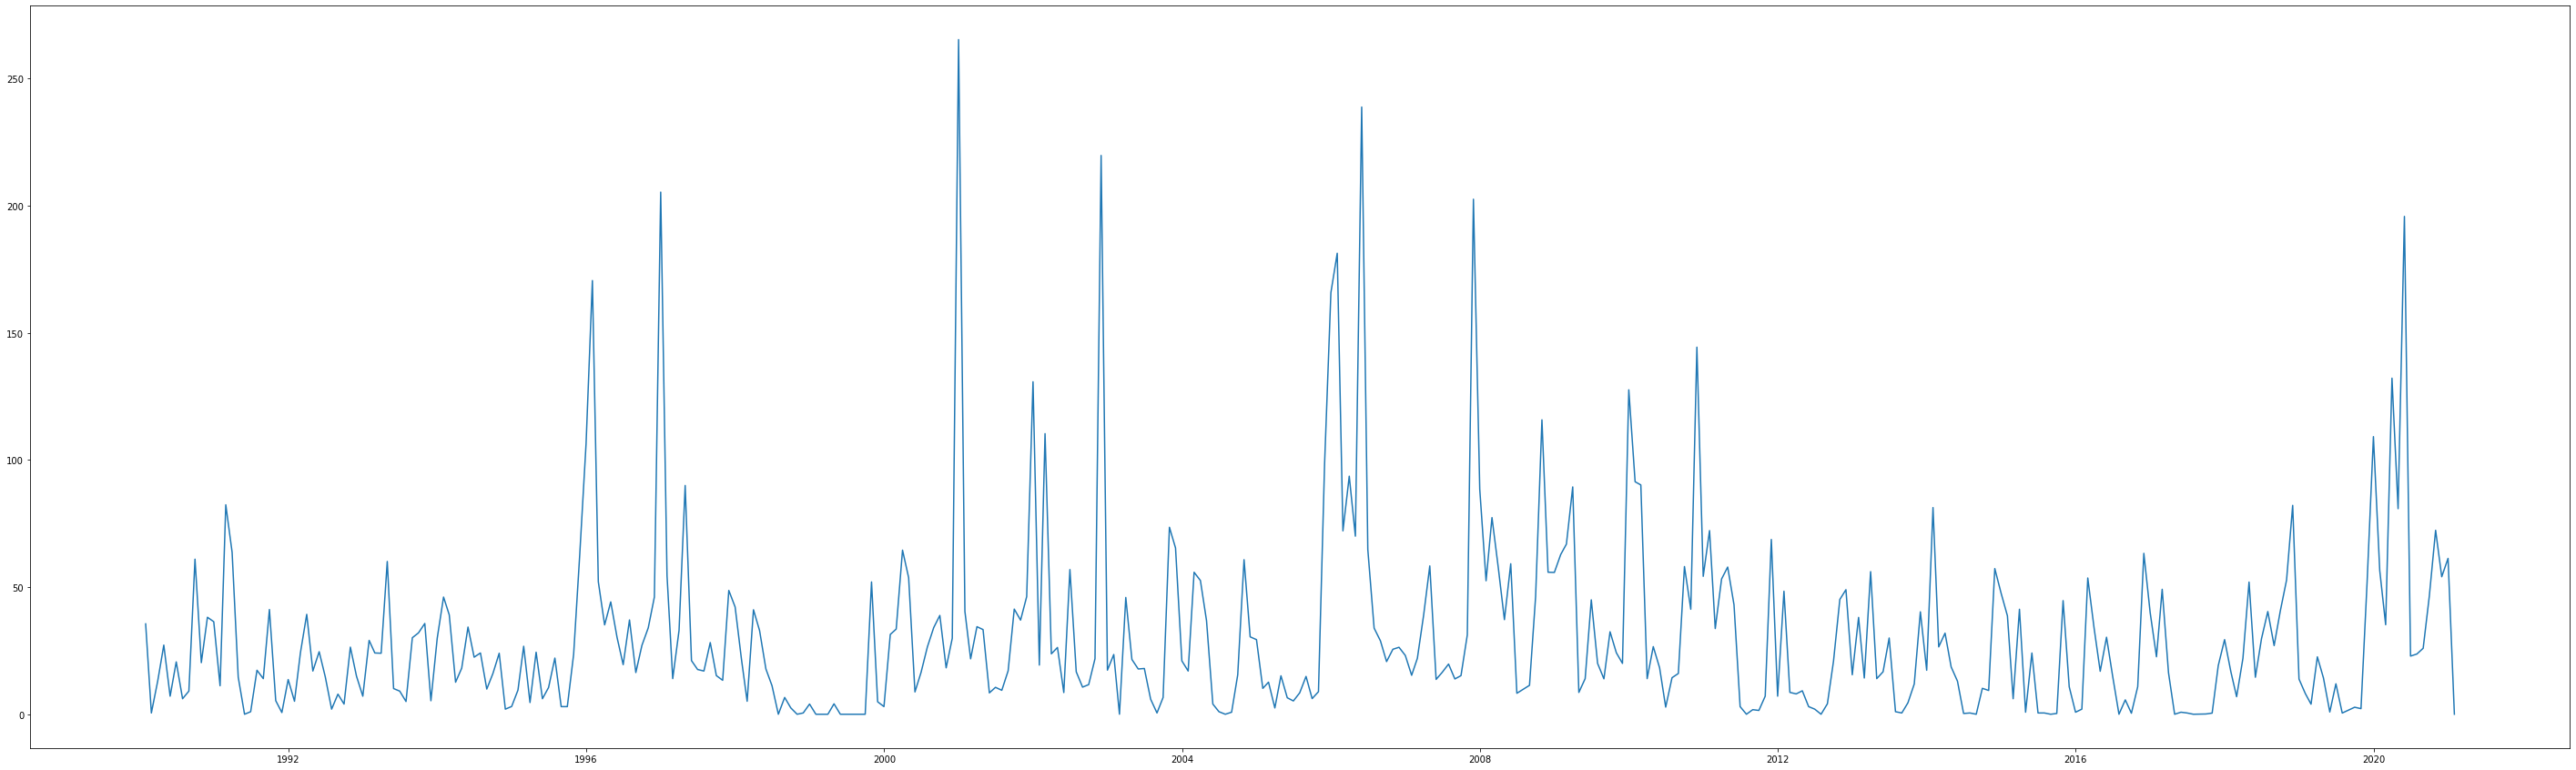

In [ ]:
ax, fig=plt.subplots(figsize=(50,15))
plt.plot(monthly)

In [ ]:
monthly.to_csv('prcp.csv')

## LSTM

In [ ]:
df = pd.read_csv('/content/prcp.csv',sep=',', parse_dates = ['date'], index_col = ['date'])

In [ ]:
len(df)

373

In [ ]:
train = df.iloc[:301]
test = df.iloc[300:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
#model.add(Activation('softmax'))

model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
289/289 [==============================] - 24s 5ms/step - loss: 0.0205 - acc: 0.0487
Epoch 2/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0166 - acc: 0.0668
Epoch 3/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0187 - acc: 0.0505
Epoch 4/50
289/289 [==============================] - 2s 6ms/step - loss: 0.0158 - acc: 0.0637
Epoch 5/50
289/289 [==============================] - 2s 6ms/step - loss: 0.0180 - acc: 0.0509
Epoch 6/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0169 - acc: 0.0702
Epoch 7/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0222 - acc: 0.0466
Epoch 8/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0197 - acc: 0.0820
Epoch 9/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0188 - acc: 0.0721
Epoch 10/50
289/289 [==============================] - 2s 5ms/step - loss: 0.0184 - acc: 0.0433
Epoch 11/50
289/289 [===========================

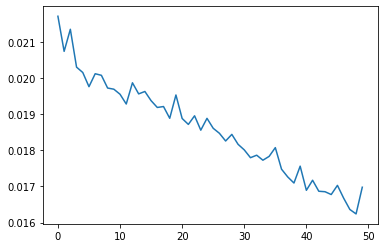

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.14646181]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.14582051])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

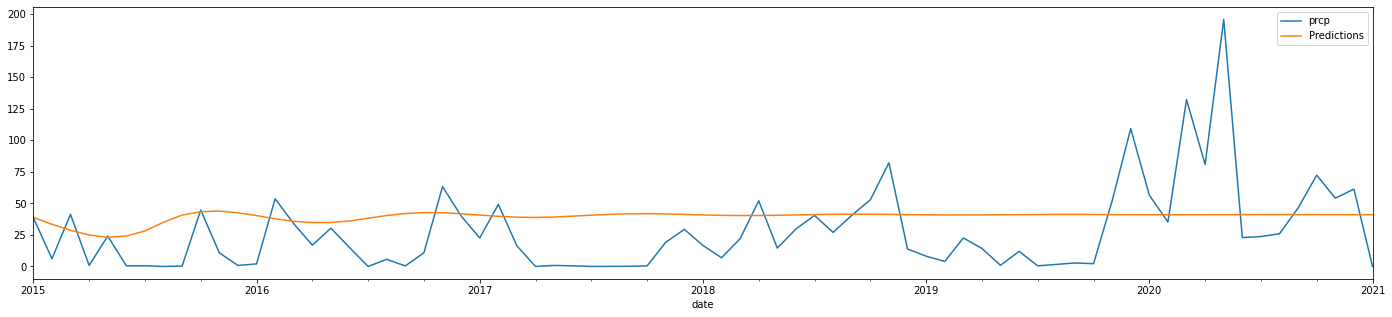

In [ ]:
test.plot(figsize=(24,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['prcp'],test['Predictions']))
print(rmse)

35.245456188013264


Pas trèès bien ,mais  meilleur que le modèle précédent

In [ ]:
scaler.fit(df)
scaled= scaler.transform(df)
generator = TimeseriesGenerator(scaled, scaled, length=n_input, batch_size=1)
model.fit(generator,epochs=50)

Epoch 1/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0157 - acc: 0.0582
Epoch 2/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0156 - acc: 0.0582
Epoch 3/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0153 - acc: 0.0582
Epoch 4/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0154 - acc: 0.0582
Epoch 5/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0154 - acc: 0.0582
Epoch 6/50
361/361 [==============================] - 2s 6ms/step - loss: 0.0154 - acc: 0.0582
Epoch 7/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0152 - acc: 0.0582
Epoch 8/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0152 - acc: 0.0582
Epoch 9/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0151 - acc: 0.0582
Epoch 10/50
361/361 [==============================] - 2s 5ms/step - loss: 0.0151 - acc: 0.0582
Epoch 11/50
361/361 [============================

In [ ]:
predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(predictions)
true_predictions

array([[36.97461348],
       [40.46702809],
       [47.25127543],
       [56.86347825],
       [62.23637179],
       [54.53568826],
       [51.67690598],
       [52.82941739],
       [55.0127465 ],
       [53.73852554],
       [50.87202765],
       [49.62328281]])